In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
import random
import re
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
dir = r"C:\Users\alvar\Clasificación_NGMP"
os.listdir(dir)

['test', 'train', 'val']

In [5]:
train_path = dir + '/train/'
test_path = dir + '/test/'
validation_path = dir + '/val/'
print("train path:", train_path)
print("test path:", test_path)
print("validation path:", validation_path)

train path: C:\Users\alvar\Clasificación_NGMP/train/
test path: C:\Users\alvar\Clasificación_NGMP/test/
validation path: C:\Users\alvar\Clasificación_NGMP/val/


In [6]:
os.listdir(test_path)

['Glioma', 'Meningioma', 'No tumor', 'Pituitaria']

In [7]:
image_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True)

In [9]:
image_generator.flow_from_directory(train_path)

Found 1888 images belonging to 4 classes.


In [10]:
image_generator.flow_from_directory(test_path)

Found 394 images belonging to 4 classes.


In [11]:
image_generator.flow_from_directory(validation_path)

Found 982 images belonging to 4 classes.


In [ ]:
##Modelo EfficientNetB1

In [12]:
eff_net_model = EfficientNetB1(
                    include_top=False,
                    weights='imagenet',
                    input_shape=(240,240,3),
                    pooling='max',
                    classes= 4
                )

for layer in eff_net_model.layers:
    layer.trainable = False

In [14]:
model_eff = Sequential([
    eff_net_model,
    Dense(2560,activation='relu'),
    BatchNormalization(),
    Dense(1280, activation='relu'),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dense(4, activation='softmax')
])

In [15]:
model_eff.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 1280)             6575239   
                                                                 
 dense_3 (Dense)             (None, 2560)              3279360   
                                                                 
 batch_normalization_2 (Batc  (None, 2560)             10240     
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1280)              3278080   
                                                                 
 batch_normalization_3 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1024)              1

In [ ]:
model_eff con tasa de aprendizaje 0.0001 y 30 etapas y batchsize = 16

In [17]:
batch_size = 16

In [16]:
model_eff.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-04) ,loss = 'categorical_crossentropy',metrics = 'accuracy')

In [18]:
train_image_generator = image_generator.flow_from_directory(train_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='categorical')

Found 1888 images belonging to 4 classes.


In [19]:
validation_image_generator = image_generator.flow_from_directory(validation_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='categorical')

Found 982 images belonging to 4 classes.


In [20]:
test_image_generator = image_generator.flow_from_directory(test_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='categorical',
                                                            shuffle = False)

Found 394 images belonging to 4 classes.


In [ ]:
#Al emplear Image_generator se están aplicando aumento de imágenes directamente en linea, no se copian las imágenes aumentadas a un nuevo directorio.

Valores de imagen antes del ajuste: min=0.0, max=218.6901397705078
Valores de imagen después del ajuste: min=0, max=218


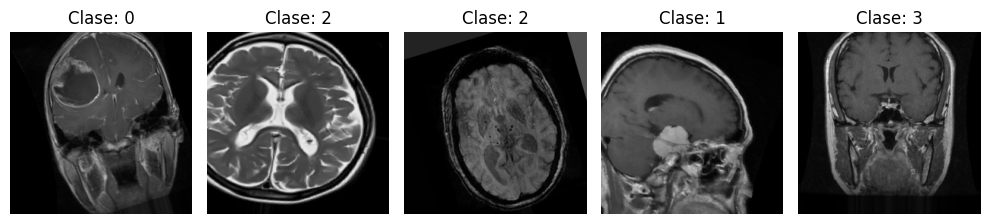

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Generar un batch de imágenes aumentado
train_batch = next(train_image_generator)  # Obtener el primer batch
images, labels = train_batch

# Escalar imágenes al rango 0-255 (si están en [0, 1])
if images.max() <= 1.0:
    images_rescaled = (images * 255).astype(np.uint8)
else:
    images_rescaled = images.astype(np.uint8)

# Mostrar las primeras 5 imágenes aumentadas
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images_rescaled[i])  # Visualizar imagen
    plt.axis('off')
    plt.title(f"Clase: {labels[i].argmax()}")
plt.tight_layout()
plt.show()

In [21]:
history = model_eff.fit(train_image_generator, validation_data=validation_image_generator, epochs=30)

Epoch 1/30
30/30 [==============================] - 85s 3s/step - loss: 0.8453 - accuracy: 0.6573 - val_loss: 0.7949 - val_accuracy: 0.6741
Epoch 2/30
30/30 [==============================] - 81s 3s/step - loss: 0.4750 - accuracy: 0.8109 - val_loss: 0.5448 - val_accuracy: 0.7892
Epoch 3/30
30/30 [==============================] - 83s 3s/step - loss: 0.3563 - accuracy: 0.8644 - val_loss: 0.4600 - val_accuracy: 0.8096
Epoch 4/30
30/30 [==============================] - 83s 3s/step - loss: 0.3318 - accuracy: 0.8729 - val_loss: 0.5616 - val_accuracy: 0.7790
Epoch 5/30
30/30 [==============================] - 84s 3s/step - loss: 0.2927 - accuracy: 0.8882 - val_loss: 0.4262 - val_accuracy: 0.8473
Epoch 6/30
30/30 [==============================] - 87s 3s/step - loss: 0.2556 - accuracy: 0.9057 - val_loss: 0.4244 - val_accuracy: 0.8554
Epoch 7/30
30/30 [==============================] - 92s 3s/step - loss: 0.2283 - accuracy: 0.9195 - val_loss: 0.4184 - val_accuracy: 0.8371
Epoch 8/30
30/30 [==

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

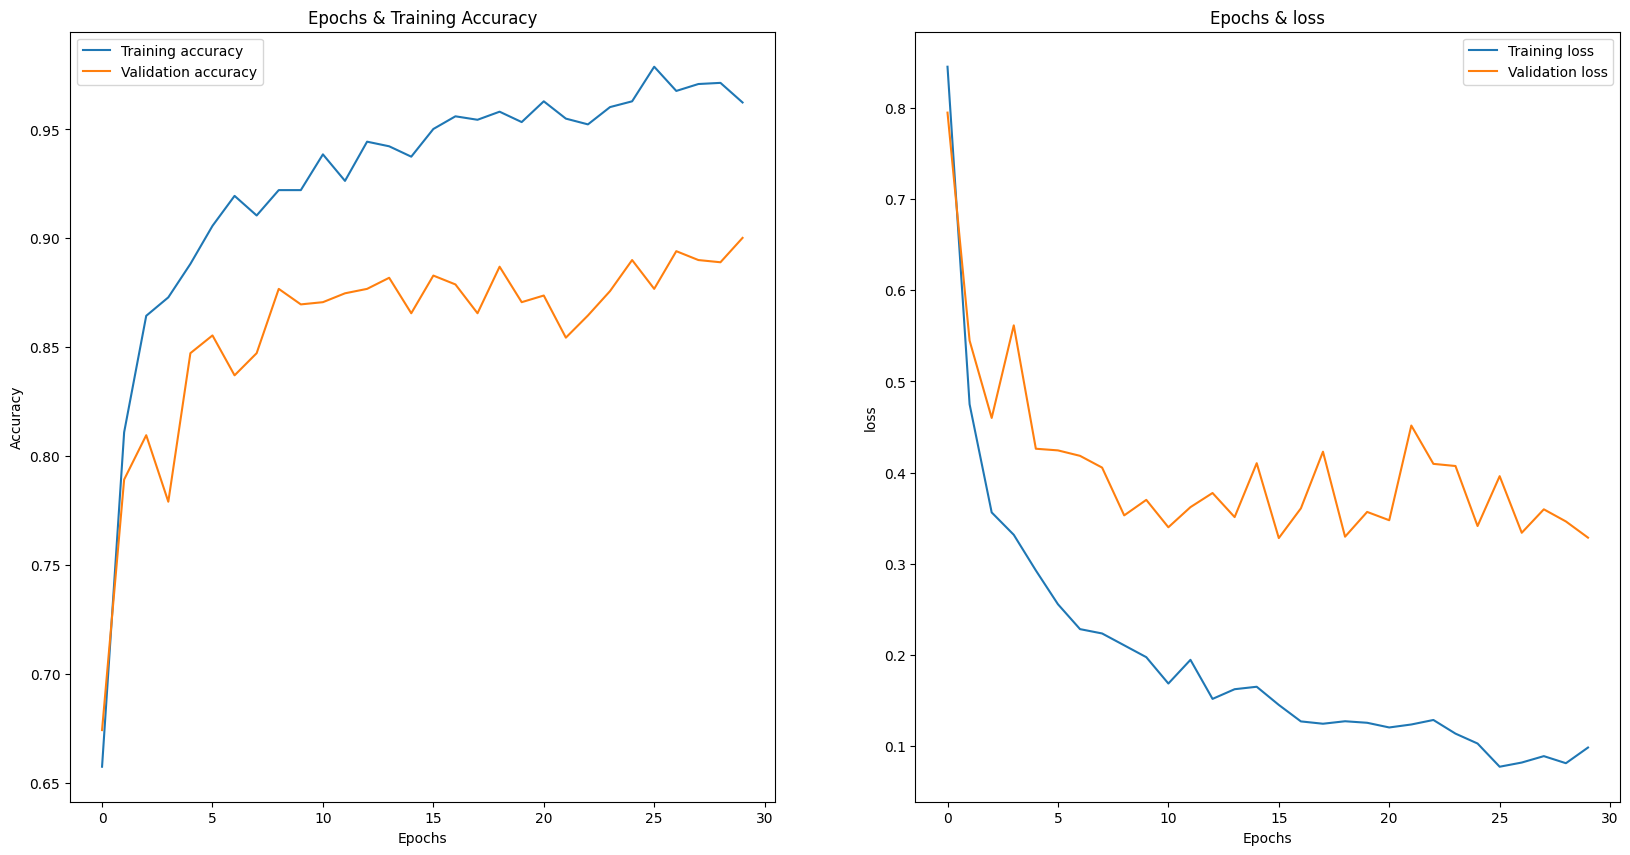

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

ax[0].plot(acc, label = 'Training accuracy')
ax[0].plot(val_acc, label = 'Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy')
ax[0].legend()


ax[1].plot(loss, label = 'Training loss')
ax[1].plot(val_loss, label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & loss')
ax[1].legend()

In [24]:
# Predicción sobre los datos de prueba
y_pred_probs = model_eff.predict(test_image_generator, steps=len(test_image_generator), verbose=1)

# Convertir probabilidades en clases predichas (índices)
y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred)
# Extraer las etiquetas reales desde el generador
y_true = test_image_generator.classes
print(y_true)

7/7 [==============================] - 8s 923ms/step
[0 0 2 1 1 1 1 2 2 2 2 2 1 1 0 0 2 0 2 1 1 1 0 2 0 0 0 1 1 2 0 1 0 2 1 0 0
 1 1 1 0 0 2 2 1 0 2 2 1 1 2 2 2 3 2 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 1 1 2 1 0 1 0 0 2 2 2 2 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 2 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 3 1 2 1 1 0 1 2 1 1 1 1 1 1 1 1 2 1 1 3 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 3 3 3 3 2 2 1 3 3 3 3 3
 3 3 3 3 3 3 3 2 3 2 2 2 2 0 2 3 3 3 2 3 3 2 2 2 2 3 3 2 2 3 3 0 3 3 3 2 3
 2 1 0 2 1 1 0 1 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

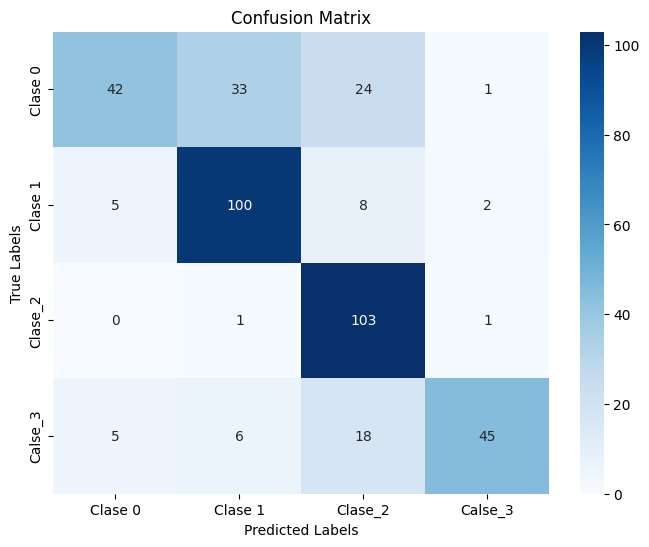

                     precision    recall  f1-score   support

    Clase 0, Glioma       0.81      0.42      0.55       100
Clase 1, Meningioma       0.71      0.87      0.78       115
  Clase_2, No tumor       0.67      0.98      0.80       105
Calse_3, Pituitatia       0.92      0.61      0.73        74

           accuracy                           0.74       394
          macro avg       0.78      0.72      0.72       394
       weighted avg       0.77      0.74      0.72       394



In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1", "Clase_2", "Calse_3"], yticklabels=["Clase 0", "Clase 1", "Clase_2", "Calse_3"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Imprimir un reporte de clasificación
report = classification_report(y_true, y_pred, target_names=["Clase 0, Glioma", "Clase 1, Meningioma", "Clase_2, No tumor", "Calse_3, Pituitatia"])
print(report)


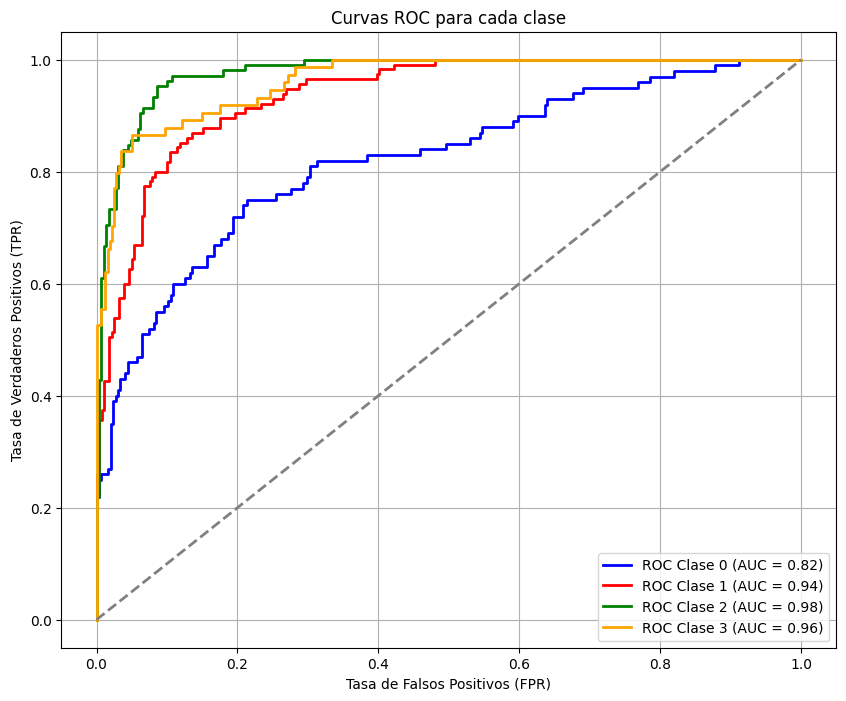

In [26]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Binarizamos las etiquetas reales (one-hot encoding)
n_classes = 4  # Número de clases
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])

# Curvas ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcular fpr, tpr y AUC para cada clase
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC Clase {i} (AUC = {roc_auc[i]:.2f})')

# Agregar línea base
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Personalización del gráfico
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para cada clase')
plt.legend(loc='lower right')
plt.grid() #Si queremos que no aparezca la cuadrícula del fondo eliminar esta línea
plt.show()
